# IRIS DATA SET CLEANING 

- Importing librairies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

- Extracting the data

In [2]:
iris = pd.read_csv('../Data-Cleaning-Challenge/iris-data.csv')

- Describing & Plotting the distribution of the data

In [3]:
iris.head()
#Ok, I see the flowers are classified per class, the rest of data seem to be numerical

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking the types:
iris.dtypes
#Everything as expected

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [5]:
iris.info()
#Hm, there seem to be some missing values in column 3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#checking the classes:
iris['class'].unique()
#Ok there seem to be some data entry issues here
#From this I see that 2 of the classes are entered with a slight difference. I will correct this before going further

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [7]:
convert_dict= {'versicolor':'Iris-versicolor','Iris-setossa':'Iris-setosa'}
iris['class'] = iris['class'].replace(convert_dict)
iris.groupby(['class'])['petal_width_cm'].mean()
#done. So now I see 3 distinct classes:
# Iris-setosa, Iris-versicolor and Iris-virginica

class
Iris-setosa        0.251111
Iris-versicolor    1.326000
Iris-virginica     2.034000
Name: petal_width_cm, dtype: float64

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>,
        <AxesSubplot:title={'center':'sepal_width_cm'}>],
       [<AxesSubplot:title={'center':'petal_length_cm'}>,
        <AxesSubplot:title={'center':'petal_width_cm'}>]], dtype=object)

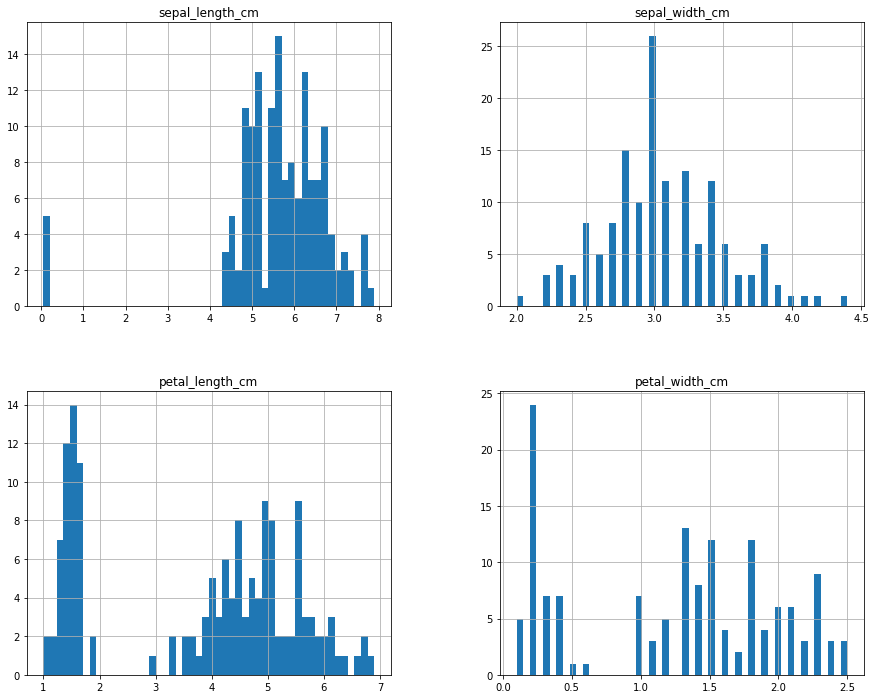

In [8]:
#Plotting distributions
iris.hist(bins = 50,figsize=(15,12))

In [9]:
# 3 percent of the values are missing in colum petal width.
# there are some 'irregularities' shown on the distribution of sepal/petl length as well as petal width, can this be linked to the classes? TBC

In [10]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

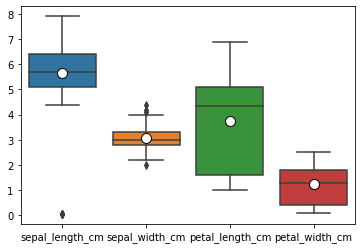

In [11]:
#Let's plot the above:

sns.boxplot(data=iris, showmeans=True, meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})
#Well this actually doesn't tell much since it groups all into 1 total category...
#let's split it

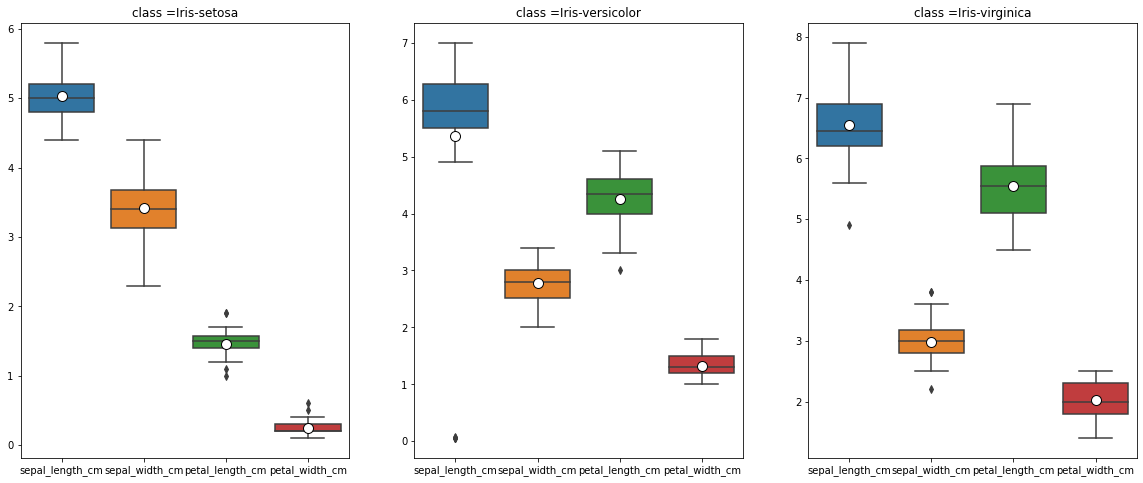

In [12]:
#Let's look at it per class
iris_class = ['Iris-setosa','Iris-versicolor','Iris-virginica',]

fig, ax = plt.subplots(1,3,figsize=(20,8))
plt.subplots_adjust()

for a, b in enumerate(iris_class):
    plt.sca(ax[a])
    plt.title('class ='+b)
    ax[a] = sns.boxplot(data=(iris.loc[iris['class']==b]), showmeans=True, meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

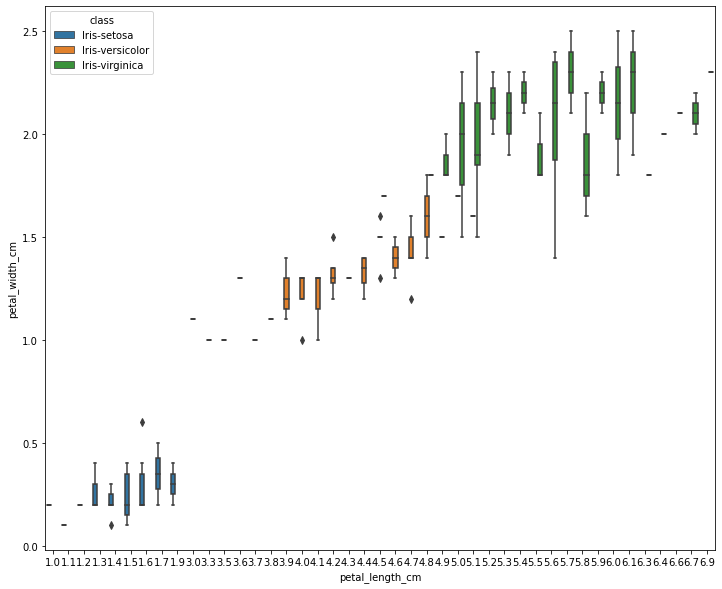

In [13]:
# Now let's look at petal len/width per class

f, ax =plt.subplots(figsize =(12,10))
ax = sns.boxplot(x="petal_length_cm", y="petal_width_cm",
                 hue="class",
                 data=iris,
            )
#we can already see the 3 very different clusters and their ranges, means, medians 

## MISSING VALUES

In [14]:
missing_values = iris.isnull().sum()
missing_values

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [15]:
# 5 missing values out of 150
missing_values_pct = missing_values/len(iris)*100
missing_values_pct

sepal_length_cm    0.000000
sepal_width_cm     0.000000
petal_length_cm    0.000000
petal_width_cm     3.333333
class              0.000000
dtype: float64

In [16]:
iris.groupby(['class'])['petal_width_cm'].mean()



class
Iris-setosa        0.251111
Iris-versicolor    1.326000
Iris-virginica     2.034000
Name: petal_width_cm, dtype: float64

In [17]:
# Let's see what is the class where there are missing values:
iris.loc[iris['petal_width_cm'].isnull()]
#Ok this tells me that the missing values all correspond to category Iris-Setosa
#and based on the point before, the average for Iris-Setosa is 0.25
#here I could do 2 things:
#- drop the null values (snce there are only 5 and represent only a 3% loss of data)
#-replace the values with the mean value for the class (since all the values are contained in a same class)

#For the sake of this excercice, let's replace the values:


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [18]:
#localizing the class and extracting the mean
petal_mean = iris['petal_width_cm'].loc[(iris['class']=='Iris-setosa')].mean()

In [19]:
#filling the non values with the mean of the respective class
iris['petal_width_cm'] = iris['petal_width_cm'].fillna(petal_mean)

In [20]:
# checking if all went as expected
iris['petal_width_cm'].loc[iris['class']=='Iris-setosa'].reset_index()
#checking the rows affected(index 7,8,9,10,11), and they were correctly inserted!
iris['petal_width_cm'][7:12]

7     0.251111
8     0.251111
9     0.251111
10    0.251111
11    0.251111
Name: petal_width_cm, dtype: float64

<AxesSubplot:>

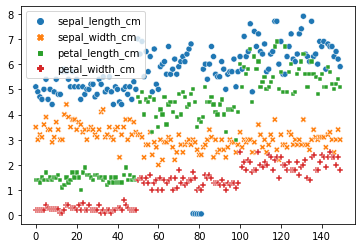

In [21]:
sns.scatterplot(data=iris)
#Ok, this is a bit rudimental and messy haha let's try spliting it
#but for now i can see that for petal lenght and width we can see the different clusters

## CLUSTERS

<AxesSubplot:xlabel='petal_length_cm', ylabel='petal_width_cm'>

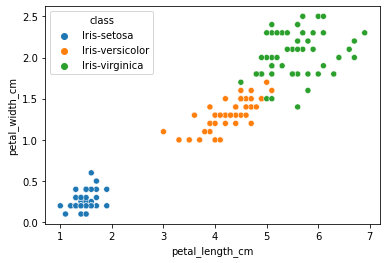

In [22]:
#Looking into the petal data

sns.scatterplot(x='petal_length_cm',y='petal_width_cm', hue='class', data=iris)
#Here we can see that everything seems ok and nicely classified :)

<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

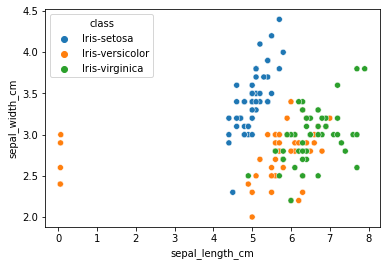

In [23]:
#Looking into the sepal data

sns.scatterplot(x='sepal_length_cm',y='sepal_width_cm', hue='class', data=iris)
#Hm, I see that there are a few flowers of the Iris-versicolor that seem to have very short sepal lengths despite the fact
#that the rest of the class seem to have longer ones... is this an enty mistake or classification issue?

In [24]:
#Let's look into it:

iris.loc[(iris['class']=='Iris-versicolor')& (iris['sepal_length_cm']<1)]
#ok, from aove graph I can clearly see that the majority of the flowers classified under iris-vesicolor have
#a sepal length between 5 and 7 cm
# When extracting the few cases where the length seem completely off (around 0) I that perhaps the unit
# on these ones are not cm but perhaps meters ?! can it be a data entry issue?

#There are ofcourse many options here:
#1- we could argue that the data is wrong and therefore take it out (this group of points is completely different to 
#the rest in their category)
#2- we could replace them by the mean ot the category on this particular characteristic (petal length)
#3- we could argue that based on the other petal lenghts of this category, these data points were included in the dataset
# with the wrong unit (m vs. cm) becasue when calculated to cm it give us a range between 5 and 7 (just like the rest of
# the flowers i the class)
#I like the 3rd option, so for the purpose of this lab, I will 'convert' the values into cm

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [25]:
tobe_replaced = iris.loc[(iris['class']=='Iris-versicolor')& (iris['sepal_length_cm']<1)].index
iris['sepal_length_cm'][tobe_replaced] = iris['sepal_length_cm'][tobe_replaced]*100


<ipython-input-25-346dce29c409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['sepal_length_cm'][tobe_replaced] = iris['sepal_length_cm'][tobe_replaced]*100


<AxesSubplot:xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

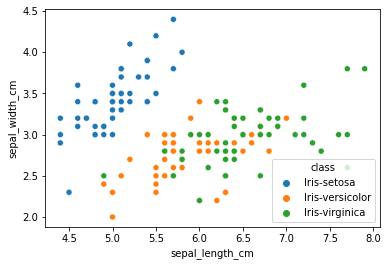

In [26]:
sns.scatterplot(x='sepal_length_cm',y='sepal_width_cm', hue='class', data=iris)
#YES!!! hehe I feel very satisfied with this result :-)

## plotting distribution again

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>,
        <AxesSubplot:title={'center':'sepal_width_cm'}>],
       [<AxesSubplot:title={'center':'petal_length_cm'}>,
        <AxesSubplot:title={'center':'petal_width_cm'}>]], dtype=object)

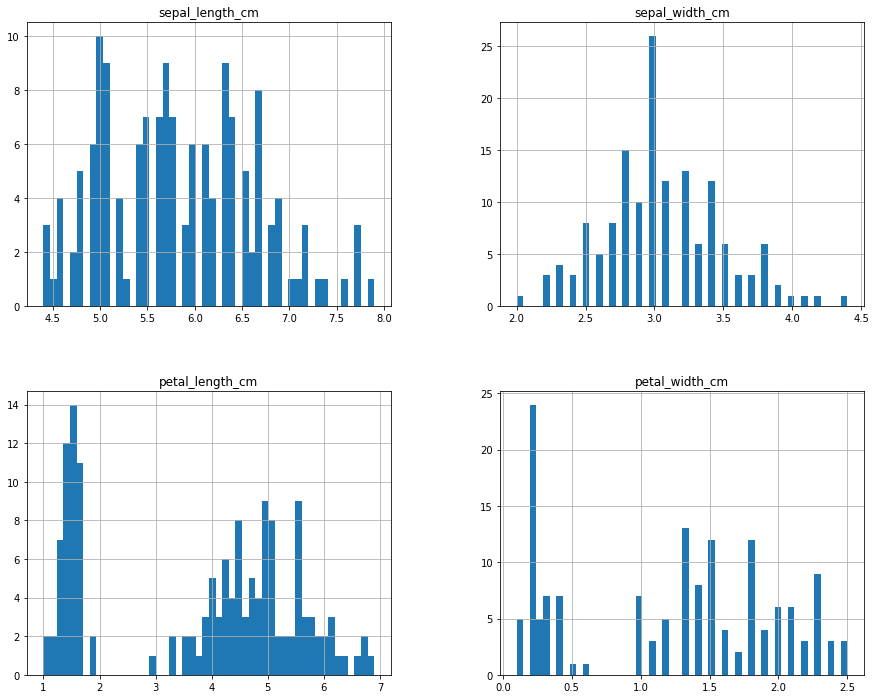

In [27]:
iris.hist(bins=50,figsize=(15,12))
#AH so satisfying! :-) (I hope is correct...):
#so, compared to the one done at the begining I see that;
#The distribution of sepal length changed and is not showing the strange gap as before
#The sepal width was ok from begining as still seems to be ok
#The petal width seem also to be the same, so to my original question: is the 'irregularity' in ranges 1-2 and 0-0.5  ok and maybe due
# to class? well, it seems the case.

In [28]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.838667,3.054667,3.758667,1.203704
std,0.804416,0.433123,1.764420,0.763205
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


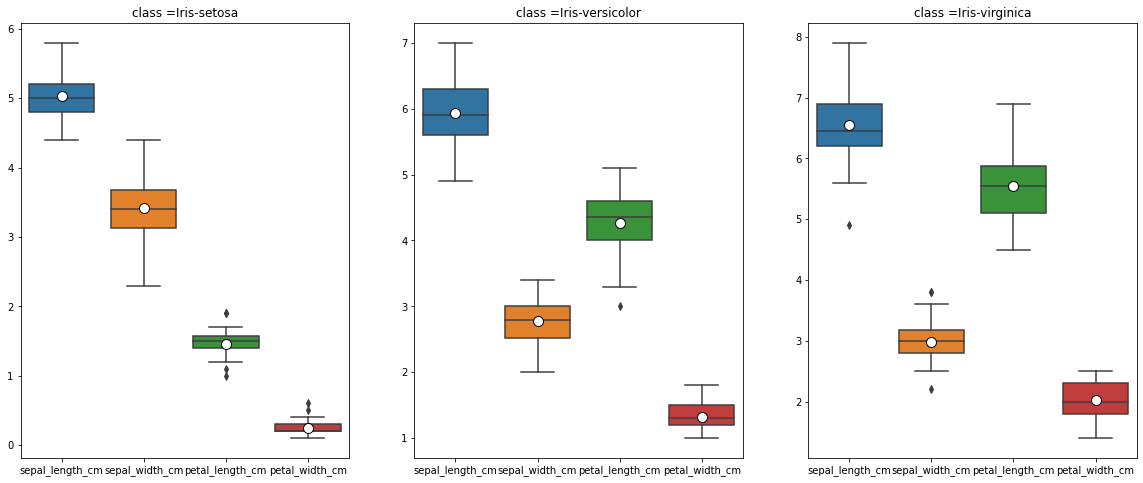

In [29]:
#Let's look at it per class
iris_class = ['Iris-setosa','Iris-versicolor','Iris-virginica',]

fig, ax = plt.subplots(1,3,figsize=(20,8))
plt.subplots_adjust()

for a, b in enumerate(iris_class):
    plt.sca(ax[a])
    plt.title('class ='+b)
    ax[a] = sns.boxplot(data=(iris.loc[iris['class']==b]), showmeans=True, meanprops={"marker":"o",
                            "markerfacecolor":"white", 
                            "markeredgecolor":"black",
                            "markersize":"10"})

In [31]:
#Saving the clean data
iris.to_csv('iris_clean.csv')